In [23]:
import csv
import ipaddress

valuesDict = {}
totalNum = 0

with open("../Downloads/ip2asn-v4.tsv", encoding='utf-8') as fd:
    rd = csv.reader(fd, delimiter="\t", quotechar='"')
    for row in rd:
        if row[2] != '0':
            startIp = ipaddress.ip_address(row[0])
            endIp = ipaddress.ip_address(row[1])
            ipCount = int(endIp)-int(startIp)+1
            totalNum += ipCount
            if row[2] not in valuesDict:
                valuesDict[row[2]] = ipCount
            else:
                valuesDict[row[2]] += ipCount
    print('Total number of ipv4 ips: ' + str(totalNum))

Total number of ipv4 ips: 2864329442


In [35]:
countryToRir = {}

with open("../Downloads/convertcsv.csv", encoding='utf-8') as file:
    for line in file:
        lineVec = line.split(';')
        countryToRir[lineVec[1]] = lineVec[3].split('\n')[0]
print(countryToRir)

{'AF': 'APNIC', 'AL': 'RIPE NCC', 'DZ': 'AFRINIC', 'AS': 'APNIC', 'AD': 'RIPE NCC', 'AO': 'AFRINIC', 'AI': 'ARIN', 'AQ': 'ARIN', 'AG': 'ARIN', 'AR': 'LACNIC', 'AM': 'RIPE NCC', 'AW': 'LACNIC', 'AU': 'APNIC', 'AT': 'RIPE NCC', 'AZ': 'RIPE NCC', 'BS': 'ARIN', 'BH': 'RIPE NCC', 'BD': 'APNIC', 'BB': 'ARIN', 'BY': 'RIPE NCC', 'BE': 'RIPE NCC', 'BZ': 'LACNIC', 'BJ': 'AFRINIC', 'BM': 'ARIN', 'BT': 'APNIC', 'BO': 'LACNIC', 'BQ': 'LACNIC', 'BA': 'RIPE NCC', 'BW': 'AFRINIC', 'BV': 'ARIN', 'BR': 'LACNIC', 'IO': 'APNIC', 'BN': 'APNIC', 'BG': 'RIPE NCC', 'BF': 'AFRINIC', 'BI': 'AFRINIC', 'KH': 'APNIC', 'CM': 'AFRINIC', 'CA': 'ARIN', 'CV': 'AFRINIC', 'KY': 'ARIN', 'CF': 'AFRINIC', 'TD': 'AFRINIC', 'CL': 'LACNIC', 'CN': 'APNIC', 'CX': 'APNIC', 'CC': 'APNIC', 'CO': 'LACNIC', 'KM': 'AFRINIC', 'CG': 'AFRINIC', 'CD': 'AFRINIC', 'CK': 'APNIC', 'CR': 'LACNIC', 'CI': 'AFRINIC', 'HR': 'RIPE NCC', 'CU': 'LACNIC', 'CW': 'LACNIC', 'CY': 'RIPE NCC', 'CZ': 'RIPE NCC', 'DK': 'RIPE NCC', 'DJ': 'AFRINIC', 'DM': 'ARI

In [2]:
valuesDictv6 = {}
totalNumv6 = 0

with open("../Downloads/ip2asn-v6.tsv", encoding='utf-8') as fd:
    rd = csv.reader(fd, delimiter="\t", quotechar='"')
    for row in rd:
        if row[2] != '0':
            startIp = ipaddress.ip_address(row[0])
            endIp = ipaddress.ip_address(row[1])
            ipCount = int(endIp)-int(startIp)+1
            totalNumv6 += ipCount
            print(row[3])
            if row[2] not in valuesDictv6:
                valuesDictv6[row[2]] = ipCount
            else:
                valuesDictv6[row[2]] += ipCount
    print('Total number of ipv6 ips: ' + str(totalNumv6))

Total number of ipv6 ips: 187969267360013891615392266341842948


In [26]:
import json
from urllib.request import urlopen

ASN_Map = {}
US = []
CN = []

numPagesPerOrg = 147;
for i in range(1, numPagesPerOrg+1):
    contents = json.loads(urlopen( "http://as-rank.caida.org/api/v1/asns?populate=1&page=" + str(i)).read());
    for item in contents["data"]:
        id = ''
        if 'id' in item:
            id = item['id']
        else:
            print('Error')
        country = ''
        if 'country' in item:
            country = item['country']
        if id != '' and country != '':
            ASN_Map[id] = country
    if i%20 == 0:
        print(str(i) + " out of " + str(numPagesPerOrg));
print('done!')

20 out of 147
40 out of 147
60 out of 147
80 out of 147
100 out of 147
120 out of 147
140 out of 147
done!


In [43]:
RirIPs = {}
total = 0
US = 0
CN = 0

for asn, ips in valuesDict.items():
    if asn in ASN_Map and (ASN_Map[asn] in countryToRir or ASN_Map[asn] == 'EU'):
        rir = 'RIPE NCC'
        if ASN_Map[asn] in countryToRir:
            rir = countryToRir[ASN_Map[asn]]
        if ASN_Map[asn] == 'CN':
            CN += ips
        elif ASN_Map[asn] == 'US':
            US += ips
        if rir in RirIPs:
            RirIPs[rir] += ips
        else:
            RirIPs[rir] = ips
    else:
        if 'unknown' in RirIPs:
            RirIPs['unknown'] += ips
        else:
            RirIPs['unknown'] = ips
    total += ips
    
for rir, ips in RirIPs.items():
    RirIPs[rir] = ips/total*100
    
RirIPs['US'] = US/total*100
RirIPs['CN'] = CN/total*100
    
print(RirIPs)    

{'APNIC': 26.878843952475773, 'ARIN': 38.03248627851097, 'unknown': 1.2772413139200627, 'RIPE NCC': 24.50031964584331, 'AFRINIC': 3.3563423812336737, 'LACNIC': 5.9547664280162085, 'US': 36.15657343091333, 'CN': 10.619432232195027}


In [133]:
print(len(NumIpsPerOrg))
with open('allPercentagesv4.txt', 'w') as f:
    for x in NumIpsPerOrg.values():
        print(float(x)/float(totalNum)*100.0, file=f)

71322


In [121]:
NumIpsPerOrgv6 = {}

for i in range(1, numPagesPerOrg+1):
    contents = json.loads(urlopen( "http://as-rank.caida.org/api/v1/orgs?populate=1&page=" + str(i)).read());
    for item in contents["data"]:
        orgName = ''
        if 'org' in item and 'name' in item['org']:
            orgName = item['org']['name']
        elif 'name' in item:
            orgName = item['name']
        NumIpsPerOrgv6[orgName] = 0
        if 'members' in item:
            for asn in item['members']:
                if str(asn) in valuesDictv6:
                    NumIpsPerOrgv6[orgName] += valuesDictv6[str(asn)]
        if NumIpsPerOrgv6[orgName] > totalNumv6:
            print(NumIpsPerOrgv6[orgName])
    if i%20 == 0:
        print(str(i) + " out of " + str(numPagesPerOrg));
print('done!')

20 out of 147
40 out of 147
60 out of 147
80 out of 147
100 out of 147
120 out of 147
140 out of 147
done!


In [122]:
print(len(NumIpsPerOrgv6))
with open('allPercentagesv6.txt', 'w') as f:
    for x in NumIpsPerOrgv6.values():
        print(float(x)/float(totalNumv6)*100.0, file=f)

71322


In [134]:
NumIpsPerOrgMerge = NumIpsPerOrg.copy()
for item in NumIpsPerOrgv6:
    if item in NumIpsPerOrgMerge:
        NumIpsPerOrgMerge[item] += NumIpsPerOrgv6[item]
    else:
        NumIpsPerOrgMerge[item] = NumIpsPerOrgv6[item]
print(len(NumIpsPerOrg))
print(len(NumIpsPerOrgv6))
print(len(NumIpsPerOrgMerge))

71322
71322
71322


In [135]:
import operator

maxKey = max(NumIpsPerOrg.items(), key=operator.itemgetter(1))[0]
print(maxKey)
print(float(NumIpsPerOrg[maxKey])/float(totalNum)*100.0)

maxKey = max(NumIpsPerOrgv6.items(), key=operator.itemgetter(1))[0]
print(maxKey)
print(float(NumIpsPerOrgv6[maxKey])/float(totalNumv6)*100.0)

maxKey = max(NumIpsPerOrgMerge.items(), key=operator.itemgetter(1))[0]
print(maxKey)
print(float(NumIpsPerOrgMerge[maxKey])/float(totalNum+totalNumv6)*100.0)

No.31,Jin-rong Street
3.5117647615898786
Cogent Communications
21.789891995787773
Cogent Communications
21.789891995787773


In [136]:
biggestOrgsv4 = {}
biggestOrgsv6 = {}
biggestOrgs = {}

for item in NumIpsPerOrg:
    if float(NumIpsPerOrg[item])/float(totalNum)*100.0 > 1.0:
        biggestOrgsv4[item] = float(NumIpsPerOrg[item])/float(totalNum)*100.0
        
for item in NumIpsPerOrgv6:
    if float(NumIpsPerOrgv6[item])/float(totalNumv6)*100.0 > 1.0:
        biggestOrgsv6[item] = float(NumIpsPerOrgv6[item])/float(totalNumv6)*100.0
        
for item in NumIpsPerOrgMerge:
    if float(NumIpsPerOrgMerge[item])/float(totalNum+totalNumv6)*100.0 > 1.0:
        biggestOrgs[item] = float(NumIpsPerOrgMerge[item])/float(totalNum+totalNumv6)*100.0

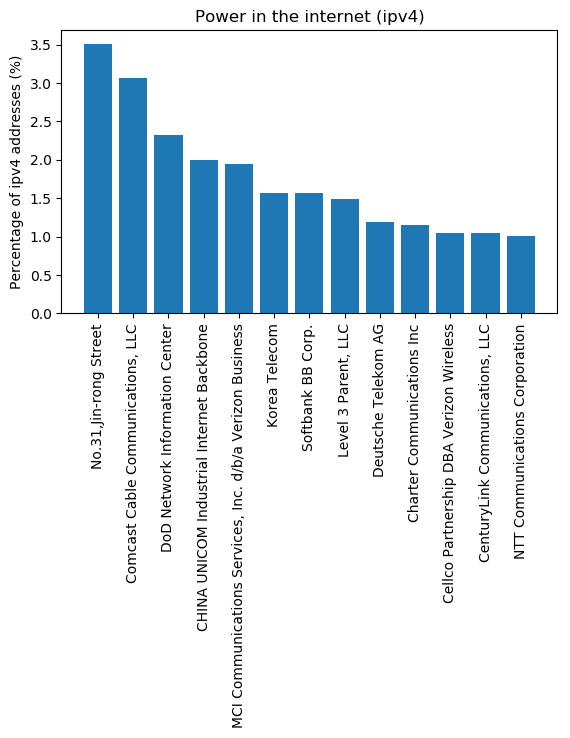

This organizations represent 22.93% of the IPv4 addresses .


In [137]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import collections

sorted_x = sorted(biggestOrgsv4.items(), key =operator.itemgetter(1), reverse=True)

x = []
y = []
totalPercentage = 0.0;

for i, j in sorted_x:
    x.append(i)
    y.append(j)
    totalPercentage += j

y_pos = np.arange(len(x))

plt.bar(y_pos, y)
plt.xticks(y_pos, x, rotation=90)
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.ylabel('Percentage of ipv4 addresses (%)') 
plt.title('Power in the internet (ipv4)')

plt.show()

print ( "This organizations represent " + str( "%.2f" % round( totalPercentage,2)) + "% of the IPv4 addresses .")

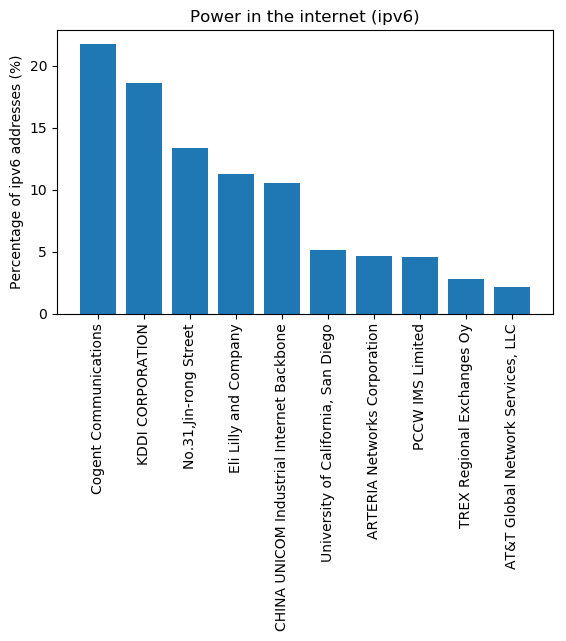

This organizations represent 94.89% of the IPv6 addresses .


In [138]:
sorted_x = sorted(biggestOrgsv6.items(), key =operator.itemgetter(1), reverse=True)

x = []
y = []
totalPercentage = 0.0;

for i, j in sorted_x:
    x.append(i)
    y.append(j)
    totalPercentage += j

y_pos = np.arange(len(x))

plt.bar(y_pos, y)
plt.xticks(y_pos, x, rotation=90)
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.ylabel('Percentage of ipv6 addresses (%)') 
plt.title('Power in the internet (ipv6)')

plt.show()

print ( "This organizations represent " + str( "%.2f" % round( totalPercentage,2)) + "% of the IPv6 addresses .")

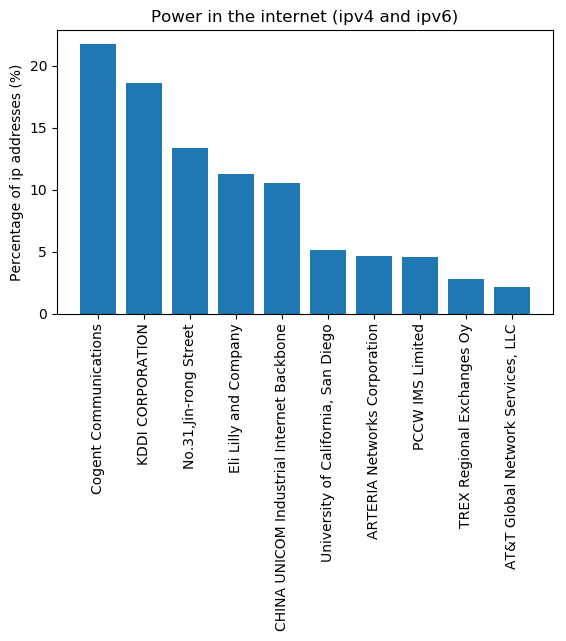

This organizations represent 94.89% of the IP addresses .


In [139]:
sorted_x = sorted(biggestOrgs.items(), key =operator.itemgetter(1), reverse=True)

x = []
y = []
totalPercentage = 0.0;

for i, j in sorted_x:
    x.append(i)
    y.append(j)
    totalPercentage += j

y_pos = np.arange(len(x))

plt.bar(y_pos, y)
plt.xticks(y_pos, x, rotation=90)
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.ylabel('Percentage of ip addresses (%)') 
plt.title('Power in the internet (ipv4 and ipv6)')

plt.show()

print ( "This organizations represent " + str( "%.2f" % round( totalPercentage,2)) + "% of the IP addresses .")

In [140]:
total = 0.0
for item in NumIpsPerOrg:
    total += float(NumIpsPerOrg[item])/float(totalNum)*100.0
print(total)

total = 0.0
for item in NumIpsPerOrgv6:
    total += float(NumIpsPerOrgv6[item])/float(totalNumv6)*100.0
print(total)

total = 0.0
for item in NumIpsPerOrgMerge:
    total += float(NumIpsPerOrgMerge[item])/float(totalNum+totalNumv6)*100.0
print(total)
    

87.3719257045729
99.36526274641002
99.36526274641002


In [4]:
import csv
import ipaddress

countriesDict = {}

with open("../Downloads/ip2asn-v4.tsv", encoding='utf-8') as fd:
    rd = csv.reader(fd, delimiter="\t", quotechar='"')
    for row in rd:
        if row[2] != '0':
            startIp = ipaddress.ip_address(row[0])
            endIp = ipaddress.ip_address(row[1])
            ipCount = int(endIp)-int(startIp)+1
            if row[3] not in countriesDict:
                countriesDict[row[3]] = ipCount
            else:
                countriesDict[row[3]] += ipCount
    
countriesDictv6 = {}

with open("../Downloads/ip2asn-v6.tsv", encoding='utf-8') as fd:
    rd = csv.reader(fd, delimiter="\t", quotechar='"')
    for row in rd:
        if row[2] != '0':
            startIp = ipaddress.ip_address(row[0])
            endIp = ipaddress.ip_address(row[1])
            ipCount = int(endIp)-int(startIp)+1
            if row[3] not in countriesDictv6:
                countriesDictv6[row[3]] = ipCount
            else:
                countriesDictv6[row[3]] += ipCount

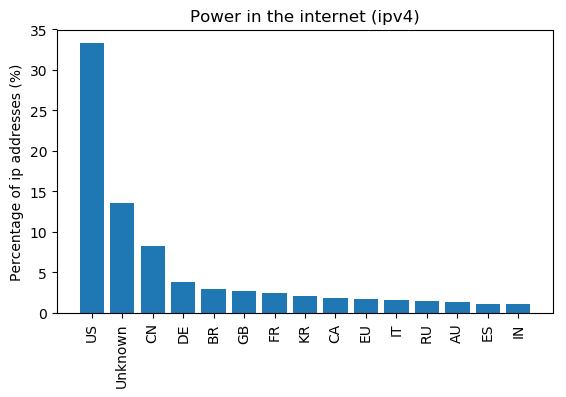

In [9]:
import operator
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import collections

sorted_x = sorted(countriesDict.items(), key =operator.itemgetter(1), reverse=True)

x = []
y = []

n = 0

for i, j in sorted_x:
    if n < 15:
        x.append(i)
        y.append(float(j)/float(totalNum)*float(100))
        n = n + 1

y_pos = np.arange(len(x))

plt.bar(y_pos, y)
plt.xticks(y_pos, x, rotation=90)
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.ylabel('Percentage of ip addresses (%)') 
plt.title('Power in the internet (ipv4)')

plt.show()

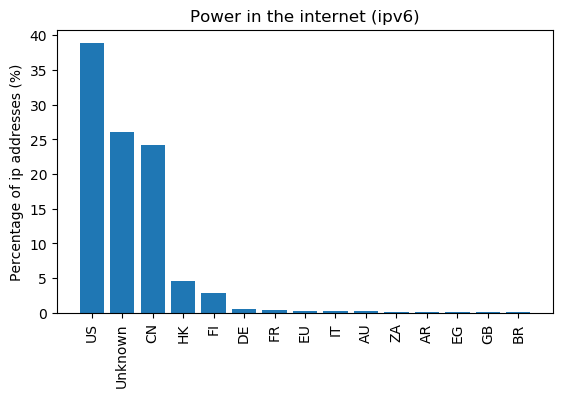

In [10]:
sorted_x = sorted(countriesDictv6.items(), key =operator.itemgetter(1), reverse=True)

x = []
y = []

n = 0

for i, j in sorted_x:
    if n < 15:
        x.append(i)
        y.append(float(j)/float(totalNumv6)*float(100))
        n = n + 1

y_pos = np.arange(len(x))

plt.bar(y_pos, y)
plt.xticks(y_pos, x, rotation=90)
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.ylabel('Percentage of ip addresses (%)') 
plt.title('Power in the internet (ipv6)')

plt.show()

In [12]:
NumIpsPerCountryMerge = countriesDict.copy()
for item in countriesDictv6:
    if item in NumIpsPerCountryMerge:
        NumIpsPerCountryMerge[item] += countriesDictv6[item]
    else:
        NumIpsPerCountryMerge[item] = countriesDictv6[item]

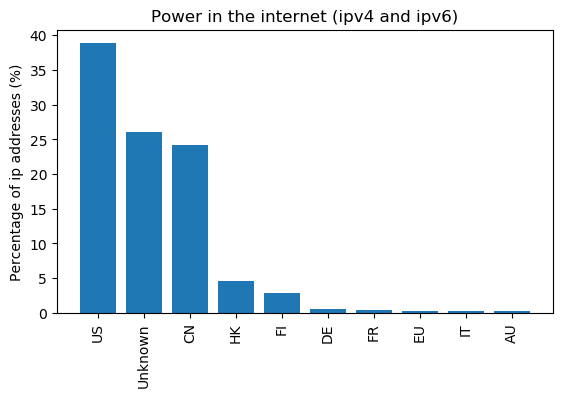

In [13]:
sorted_x = sorted(NumIpsPerCountryMerge.items(), key =operator.itemgetter(1), reverse=True)

x = []
y = []

n=0
for i, j in sorted_x:
    if n < 10:
        x.append(i)
        y.append(float(j)/float(totalNum+totalNumv6)*float(100))
        n = n + 1

y_pos = np.arange(len(x))

plt.bar(y_pos, y)
plt.xticks(y_pos, x, rotation=90)
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.ylabel('Percentage of ip addresses (%)') 
plt.title('Power in the internet (ipv4 and ipv6)')

plt.show()